### Problem Statement: 
#### A digital markeing agency ran an ad-campaign on facebook. As per their data collected, we need to predict the Approved  conversion for future campaigns based on multiple parameters used.

In [1]:
# 1. import libraries
# 2. import data
# 3. EDA - 
# a. Univariate Analysis
#    a.i) Checking Missing Values
#    a.ii) Remove outliers
# b. Bivariate Analysis - Check relationship between the independent variable & dependent variable
#    b.i) Correlation Co-efficient Between variables
#    b.ii) Heatmap (10x10 Matrix)

# 4. Data Partition
# 5. Model Building
# a. Multicolinearity - with VIF
# b. Removing the insignificant variable
# c. Backward Elimination Method
# d. VIF of Model

# 6. Assumption of Model
# a) Homoscedasicity
# b) Normality
# c) Model Error IID
# 7. Prediction on Test Data
# 8. MSE & MAE & RMSE for evaluation of Model on test data
# 9. MSE & MAE & RMSE for evaluation of Model on train data

# Importing Libraries & Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression   # all models to come under sklearn package - only modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
%matplotlib inline
import os 

In [3]:
os.chdir(r'C:\Users\RONALD\Desktop\Python Code\Practise\Projects\MLR')
campaign_data = pd.read_csv('fb-campaign-data.csv')  #fb-campaign-data.csv

In [4]:
campaign_data.head()

,impressions,clicks,spent,CTR,Avg CPC,App Install,total_conversion,approved_conversion
0,7350,2,1.43,0.000272,0.715,0,2,1
1,17861,2,1.82,0.000112,0.910,0,2,0
2,693,0,0.00,0.000000,0.000,0,0,0
3,4259,1,1.25,0.000235,1.250,0,1,0
4,4133,1,1.29,0.000242,1.290,0,1,1


In [5]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 8 columns):
impressions            1143 non-null int64
clicks                 1143 non-null int64
spent                  1143 non-null float64
CTR                    1143 non-null float64
Avg CPC                1143 non-null float64
App Install            1143 non-null int64
total_conversion       1143 non-null int64
approved_conversion    1143 non-null int64
dtypes: float64(3), int64(5)
memory usage: 71.5 KB


In [6]:
campaign_data.describe()

,impressions,clicks,spent,CTR,Avg CPC,App Install,total_conversion,approved_conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,1.867321e+05,33.391076,51.360656,0.000164,1.227192,6.759405,2.670166,0.877515
std,3.127622e+05,56.891947,86.908418,0.000115,0.615051,13.007637,4.574797,1.750870
min,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.503500e+03,1.000000,1.480000,0.000101,1.232000,0.000000,1.000000,0.000000
50%,5.150900e+04,8.000000,12.370000,0.000160,1.450000,0.000000,1.000000,0.000000
75%,2.217690e+05,37.500000,60.025000,0.000234,1.600000,10.000000,3.000000,1.000000
max,3.052003e+06,421.000000,639.949998,0.001059,2.212000,80.000000,60.000000,21.000000


# EDA

## A. Univariate Analysis

### Checking missing values

In [7]:
# ---- to check null values in the dataset
campaign_data.isnull().sum(axis=0)    #axis=0 for rows, axis=1 for columns

impressions            0
clicks                 0
spent                  0
CTR                    0
Avg CPC                0
App Install            0
total_conversion       0
approved_conversion    0
dtype: int64

C:\Users\RONALD\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


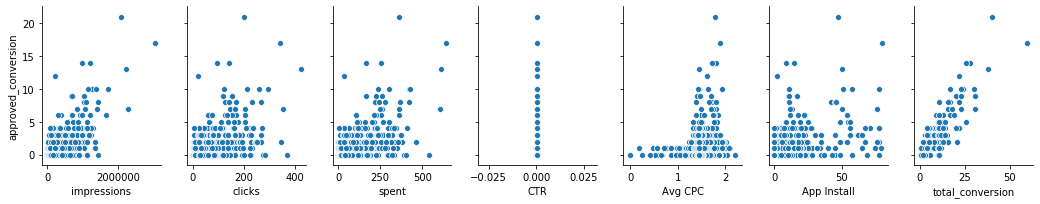

In [8]:
# Data Visualization - (* Check outliers also)

sns.pairplot(campaign_data, x_vars=['impressions','clicks','spent','CTR', 'Avg CPC', 'App Install','total_conversion'], y_vars='approved_conversion', size=3, aspect=0.7, kind='scatter')


## Checking & Treating/Removing Outliers

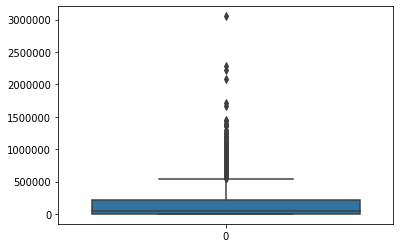

In [9]:
sns.boxplot(data=campaign_data['impressions'])

In [10]:
### ------- Winsorizing technique for variable Impressions---------------

q1 = campaign_data['impressions'].quantile(0.25)
q3 = campaign_data['impressions'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(-316394.75, 544667.25)

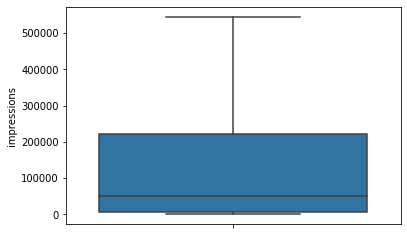

In [11]:
campaign_data['impressions'] = np.where(campaign_data['impressions'] > high,high,campaign_data['impressions'])  #upper limit

campaign_data['impressions'] = np.where(campaign_data['impressions'] < low,low,campaign_data['impressions'])  #lower limit

sns.boxplot(y=campaign_data['impressions'])    # for horizontal use x instead of y

In [12]:
campaign_data['impressions'].describe()

count      1143.000000
mean     144418.444226
std      184174.591624
min          87.000000
25%        6503.500000
50%       51509.000000
75%      221769.000000
max      544667.250000
Name: impressions, dtype: float64

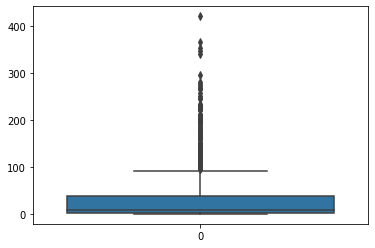

In [13]:
sns.boxplot(data=campaign_data['clicks'])

In [14]:
### ------- Winsorizing technique for variable clicks---------------

q1 = campaign_data['clicks'].quantile(0.25)
q3 = campaign_data['clicks'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(-53.75, 92.25)

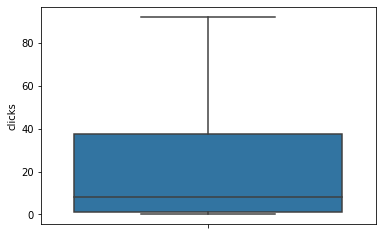

In [15]:
campaign_data['clicks'] = np.where(campaign_data['clicks'] > high,high,campaign_data['clicks'])  #upper limit

campaign_data['clicks'] = np.where(campaign_data['clicks'] < low,low,campaign_data['clicks'])  #lower limit

sns.boxplot(y=campaign_data['clicks'])    # for horizontal use x instead of y

In [16]:
campaign_data['clicks'].describe()

count    1143.000000
mean       24.664698
std        31.630431
min         0.000000
25%         1.000000
50%         8.000000
75%        37.500000
max        92.250000
Name: clicks, dtype: float64

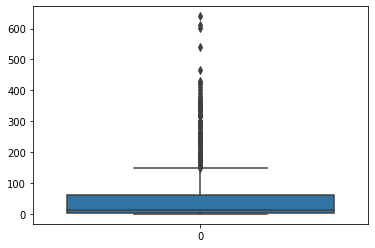

In [17]:
sns.boxplot(data=campaign_data['spent'])

In [18]:
### ------- Winsorizing technique for variable spent---------------

q1 = campaign_data['spent'].quantile(0.25)
q3 = campaign_data['spent'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(-86.337499825, 147.842499759)

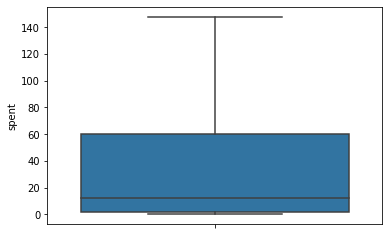

In [19]:
campaign_data['spent'] = np.where(campaign_data['spent'] > high,high,campaign_data['spent'])  #upper limit

campaign_data['spent'] = np.where(campaign_data['spent'] < low,low,campaign_data['spent'])  #lower limit

cx = sns.boxplot(y=campaign_data['spent'])    # for horizontal use x instead of y

In [20]:
campaign_data['spent'].describe()

count    1143.000000
mean       38.889503
std        50.502589
min         0.000000
25%         1.480000
50%        12.370000
75%        60.025000
max       147.842500
Name: spent, dtype: float64

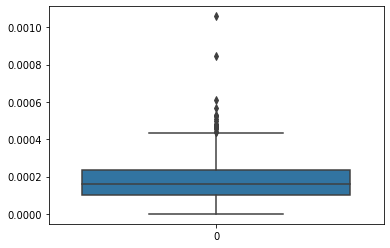

In [21]:
sns.boxplot(data=campaign_data['CTR'])

In [22]:
### ------- Winsorizing technique for variable CTR---------------

q1 = campaign_data['CTR'].quantile(0.25)
q3 = campaign_data['CTR'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(-9.974999999999999e-05, 0.00043424999999999996)

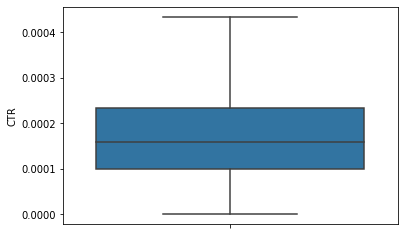

In [23]:
campaign_data['CTR'] = np.where(campaign_data['CTR'] > high,high,campaign_data['CTR'])  #upper limit

campaign_data['CTR'] = np.where(campaign_data['CTR'] < low,low,campaign_data['CTR'])  #lower limit

sns.boxplot(y=campaign_data['CTR'])    # for horizontal use x instead of y

In [24]:
campaign_data['CTR'].describe()

count    1143.000000
mean        0.000163
std         0.000108
min         0.000000
25%         0.000101
50%         0.000160
75%         0.000234
max         0.000434
Name: CTR, dtype: float64

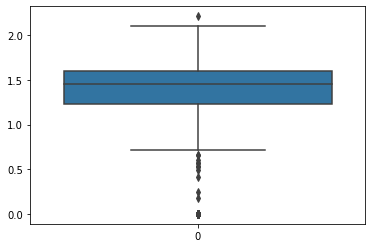

In [25]:
sns.boxplot(data=campaign_data['Avg CPC'])

In [26]:
### ------- Winsorizing technique for variable Avg CPC---------------

q1 = campaign_data['Avg CPC'].quantile(0.25)
q3 = campaign_data['Avg CPC'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(0.6799999999999998, 2.152)

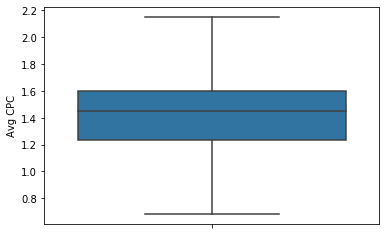

In [27]:
campaign_data['Avg CPC'] = np.where(campaign_data['Avg CPC'] > high,high,campaign_data['Avg CPC'])  #upper limit

campaign_data['Avg CPC'] = np.where(campaign_data['Avg CPC'] < low,low,campaign_data['Avg CPC'])  #lower limit

sns.boxplot(y=campaign_data['Avg CPC'])    # for horizontal use x instead of y

In [28]:
campaign_data['Avg CPC'].describe()

count    1143.000000
mean        1.352069
std         0.375998
min         0.680000
25%         1.232000
50%         1.450000
75%         1.600000
max         2.152000
Name: Avg CPC, dtype: float64

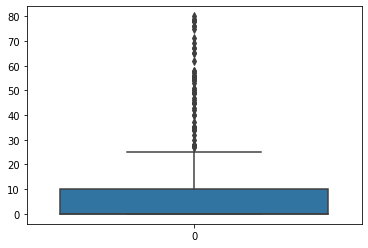

In [29]:
sns.boxplot(data=campaign_data['App Install'])

In [30]:
### ------- Winsorizing technique for variable App Install---------------

q1 = campaign_data['App Install'].quantile(0.25)
q3 = campaign_data['App Install'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(-15.0, 25.0)

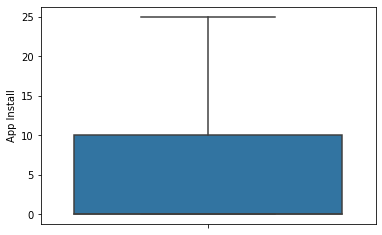

In [31]:
campaign_data['App Install'] = np.where(campaign_data['App Install'] > high,high,campaign_data['App Install'])  #upper limit

campaign_data['App Install'] = np.where(campaign_data['App Install'] < low,low,campaign_data['App Install'])  #lower limit

dx = sns.boxplot(y=campaign_data['App Install'])    # for horizontal use x instead of y

In [32]:
### ------- Winsorizing technique for variable total_conversion---------------

q1 = campaign_data['total_conversion'].quantile(0.25)
q3 = campaign_data['total_conversion'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(-2.0, 6.0)

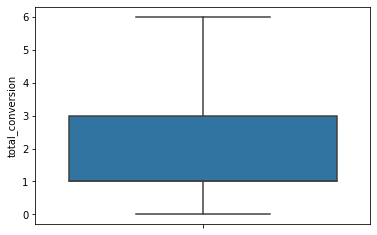

In [33]:
campaign_data['total_conversion'] = np.where(campaign_data['total_conversion'] > high,high,campaign_data['total_conversion'])  #upper limit

campaign_data['total_conversion'] = np.where(campaign_data['total_conversion'] < low,low,campaign_data['total_conversion'])  #lower limit

dx = sns.boxplot(y=campaign_data['total_conversion'])    # for horizontal use x instead of y

In [34]:
campaign_data['total_conversion'].describe()

count    1143.000000
mean        1.944882
std         1.880289
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         6.000000
Name: total_conversion, dtype: float64

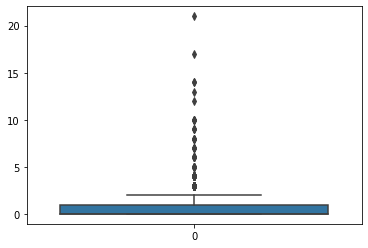

In [35]:
sns.boxplot(data=campaign_data['approved_conversion'])

In [36]:
### ------- Winsorizing technique for variable approved_conversion---------------

q1 = campaign_data['approved_conversion'].quantile(0.25)
q3 = campaign_data['approved_conversion'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr  #acceptable range

low, high

(-1.5, 2.5)

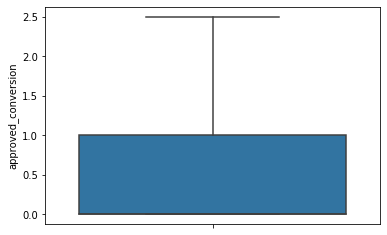

In [37]:
campaign_data['approved_conversion'] = np.where(campaign_data['approved_conversion'] > high,high,campaign_data['approved_conversion'])  #upper limit

campaign_data['approved_conversion'] = np.where(campaign_data['approved_conversion'] < low,low,campaign_data['approved_conversion'])  #lower limit

ex = sns.boxplot(y=campaign_data['approved_conversion'])    # for horizontal use x instead of y

In [38]:
campaign_data['approved_conversion'].describe()

count    1143.000000
mean        0.644357
std         0.826541
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.500000
Name: approved_conversion, dtype: float64

### Outliers have been removed/treated. 

In [39]:
campaign_data.describe()

,impressions,clicks,spent,CTR,Avg CPC,App Install,total_conversion,approved_conversion
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,144418.444226,24.664698,38.889503,0.000163,1.352069,5.314961,1.944882,0.644357
std,184174.591624,31.630431,50.502589,0.000108,0.375998,7.873597,1.880289,0.826541
min,87.000000,0.000000,0.000000,0.000000,0.680000,0.000000,0.000000,0.000000
25%,6503.500000,1.000000,1.480000,0.000101,1.232000,0.000000,1.000000,0.000000
50%,51509.000000,8.000000,12.370000,0.000160,1.450000,0.000000,1.000000,0.000000
75%,221769.000000,37.500000,60.025000,0.000234,1.600000,10.000000,3.000000,1.000000
max,544667.250000,92.250000,147.842500,0.000434,2.152000,25.000000,6.000000,2.500000


C:\Users\RONALD\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


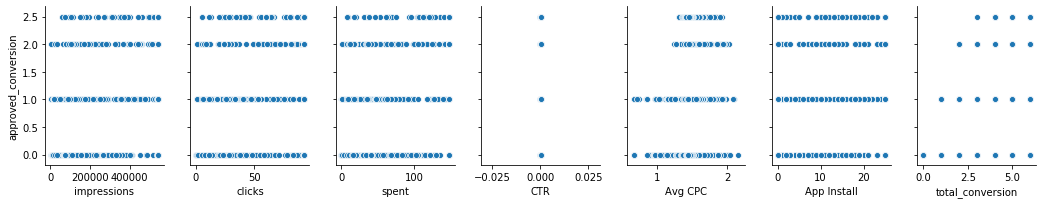

In [40]:
sns.pairplot(campaign_data, x_vars=['impressions','clicks','spent', 'CTR', 'Avg CPC', 'App Install', 'total_conversion'], y_vars='approved_conversion', size=3, aspect=0.7, kind='scatter')

## B. Bivariate Analysis

In [41]:
# ------------ Step 4. Data Partition -------------

X = campaign_data.drop('approved_conversion', axis=1)
Y = campaign_data[['approved_conversion']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)


In [42]:
# X_train.columns: 'impressions', 'clicks', 'spent', 'CTR', 'Avg CPC', 'App Install', 'total_conversion'
# X_test.columns: 'impressions', 'clicks', 'spent', 'CTR', 'Avg CPC', 'App Install', 'total_conversion'
# y_train.columns: 'approved_conversion'
# y_test.columns : 'approved_conversion'

## Data Partition

### Correlation Matrix

In [43]:
# --------------- Correlation Matrix ----------------

campaign_data_new = pd.concat([y_train, X_train], axis=1)

In [44]:
# campaign_data_new.columns =['approved_conversion', 'impressions', 'clicks', 'spent', 'CTR', 'Avg CPC','App Install', 'total_conversion']

,approved_conversion,impressions,clicks,spent,CTR,Avg CPC,App Install,total_conversion
approved_conversion,1.000000,0.579770,0.529271,0.538351,0.130013,0.398501,0.484826,0.724245
impressions,0.579770,1.000000,0.972800,0.980066,0.131109,0.422616,0.840684,0.811053
clicks,0.529271,0.972800,1.000000,0.996579,0.218670,0.390802,0.853652,0.758333
spent,0.538351,0.980066,0.996579,1.000000,0.201960,0.407426,0.854006,0.766659
CTR,0.130013,0.131109,0.218670,0.201960,1.000000,0.423096,0.191904,0.194294
Avg CPC,0.398501,0.422616,0.390802,0.407426,0.423096,1.000000,0.350036,0.511898
App Install,0.484826,0.840684,0.853652,0.854006,0.191904,0.350036,1.000000,0.686829
total_conversion,0.724245,0.811053,0.758333,0.766659,0.194294,0.511898,0.686829,1.000000


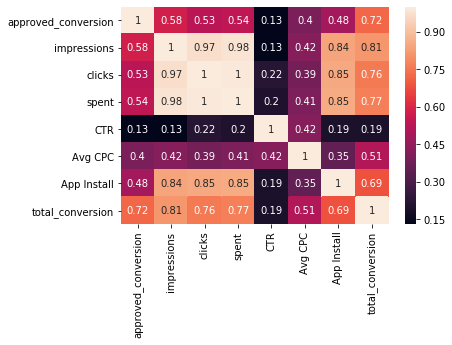

In [45]:
corr = campaign_data_new.corr()
display(corr)
sns.heatmap(corr,annot = True)

In [46]:
X_train.head()

,impressions,clicks,spent,CTR,Avg CPC,App Install,total_conversion
578,297452.00,30.00,52.0200,0.000101,1.734,10.0,4.0
844,544667.25,92.25,147.8425,0.000194,1.501,21.0,6.0
50,11199.00,4.00,5.7300,0.000357,1.433,0.0,1.0
795,179950.00,35.00,58.6800,0.000194,1.677,0.0,1.0
653,220581.00,31.00,57.3700,0.000141,1.851,5.0,1.0


## 5. Model Building

In [47]:
# -------- Model Building --------

X_1 = sm.add_constant(X_train)

model = sm.OLS(y_train, X_1).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     approved_conversion   R-squared:                       0.529
Model:                             OLS   Adj. R-squared:                  0.524
Method:                  Least Squares   F-statistic:                     126.8
Date:                 Sun, 01 Dec 2019   Prob (F-statistic):          9.56e-125
Time:                         01:01:56   Log-Likelihood:                -667.82
No. Observations:                  800   AIC:                             1352.
Df Residuals:                      792   BIC:                             1389.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0674   

C:\Users\RONALD\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [48]:
campaign_data_new.columns

Index(['approved_conversion', 'impressions', 'clicks', 'spent', 'CTR',
       'Avg CPC', 'App Install', 'total_conversion'],
      dtype='object')

In [49]:
X1 = campaign_data_new.drop(['approved_conversion'], axis = 1)
# the VIF does expect a constant term in the data,
#so we need to add one sing the add_constant method
# X1 = sm.add_constant(econ_df_before)
from statsmodels.stats.outliers_influence import variance_inflation_factor
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_before


impressions          65.587633
clicks              260.085557
spent               335.610194
CTR                   5.281245
Avg CPC               6.303734
App Install           5.420361
total_conversion      7.299835
dtype: float64

In [50]:
X_train = X_train.drop(['spent'],axis=1)  #spent = 335.610194
# X_train.columns = impressions', 'clicks', 'spent', 'CTR', 'Avg CPC', 'App Install','total_conversion'

In [51]:
X_train.columns # total columns in X_train = 6

Index(['impressions', 'clicks', 'CTR', 'Avg CPC', 'App Install',
       'total_conversion'],
      dtype='object')

In [52]:
# define our input
X2 = sm.add_constant(X_train)

# create a OLS model
model2 = sm.OLS(y_train, X2).fit()
print(model2.summary())

                             OLS Regression Results                            
Dep. Variable:     approved_conversion   R-squared:                       0.529
Model:                             OLS   Adj. R-squared:                  0.525
Method:                  Least Squares   F-statistic:                     148.1
Date:                 Sun, 01 Dec 2019   Prob (F-statistic):          7.59e-126
Time:                         01:01:56   Log-Likelihood:                -667.83
No. Observations:                  800   AIC:                             1350.
Df Residuals:                      793   BIC:                             1382.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0697   

In [53]:
campaign_data_new.columns

Index(['approved_conversion', 'impressions', 'clicks', 'spent', 'CTR',
       'Avg CPC', 'App Install', 'total_conversion'],
      dtype='object')

In [54]:
X1 = campaign_data_new.drop(['approved_conversion', 'spent'], axis = 1)
# the VIF does expect a constant term in the data,
#so we need to add one sing the add_constant method
# X1 = sm.add_constant(econ_df_before)

series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_before


# X1 now has 6 columns --> impressions', 'clicks', 'CTR', 'Avg CPC', 'App Install','total_conversion'

impressions         50.965928
clicks              43.891114
CTR                  5.268001
Avg CPC              6.296129
App Install          5.408055
total_conversion     7.199388
dtype: float64

In [55]:
X_train = X_train.drop(['impressions'], axis=1)  #impressions = 50.965928
#X_train.columns #= impressions', 'clicks', 'CTR', 'Avg CPC', 'App Install','total_conversion'

In [76]:
X_train.columns

Index(['clicks', 'CTR', 'Avg CPC', 'App Install', 'total_conversion'], dtype='object')

In [56]:
#define our input
X3 = sm.add_constant(X_train)  # X_train with 7 columns have been added in X3

# create a OLS model
model3 = sm.OLS(y_train, X3).fit()
print(model3.summary())

                             OLS Regression Results                            
Dep. Variable:     approved_conversion   R-squared:                       0.527
Model:                             OLS   Adj. R-squared:                  0.524
Method:                  Least Squares   F-statistic:                     177.0
Date:                 Sun, 01 Dec 2019   Prob (F-statistic):          1.85e-126
Time:                         01:01:57   Log-Likelihood:                -669.07
No. Observations:                  800   AIC:                             1350.
Df Residuals:                      794   BIC:                             1378.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0836   

In [57]:
campaign_data_new.columns

Index(['approved_conversion', 'impressions', 'clicks', 'spent', 'CTR',
       'Avg CPC', 'App Install', 'total_conversion'],
      dtype='object')

In [58]:
X1 = campaign_data_new.drop(['approved_conversion', 'spent' , 'impressions'], axis = 1)
# the VIF does expect a constant term in the data,
#so we need to add one sing the add_constant method
# X1 = sm.add_constant(econ_df_before)

series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_before

# X1 now has 5 columns --> 'clicks', 'CTR', 'Avg CPC', 'App Install','total_conversion'

clicks              7.463606
CTR                 4.029450
Avg CPC             5.789081
App Install         5.397724
total_conversion    5.592729
dtype: float64

### 6. Assumptions of Model

In [59]:
# ------- 1. Homoscedasticity ---------

Data=pd.concat([X_train,y_train], axis=1)

In [60]:
Data['Fitted_value'] = model3.fittedvalues
Data['Residual'] = model3.resid

#Data['Fitted_value'] = final_model.fittedvalues
#Data['Residual'] = final_model.resid

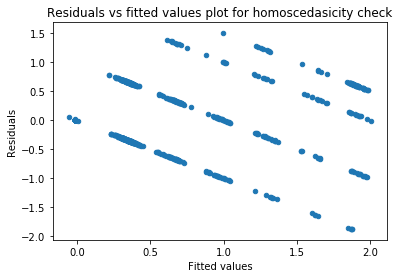

In [61]:
p = Data.plot.scatter(x='Fitted_value', y='Residual')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasicity check')
plt.show()

In [63]:
# Run the Breusch - Pagan test
from statsmodels.stats import diagnostic as diag 
_, pval2, __, f_pval2 = diag.het_breuschpagan(model3.resid, model3.model.exog)

print(pval2, f_pval2)

2.784313529005721e-30 1.9227755716437083e-33


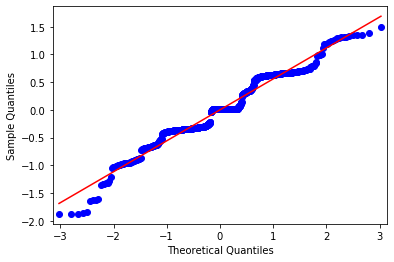

In [64]:
# --------- Normality ------------
import pylab
#check for the normality of the residuals
sm.qqplot(model3.resid, line='s')

#sm.qqplot(final_model.resid, line='s')

# s indicate standardized line
pylab.show()

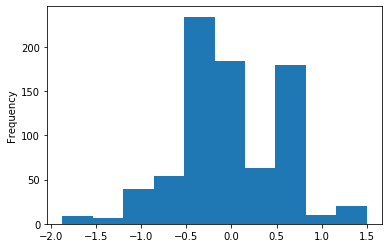

In [65]:
# ----------- Model Error ----------

Data['Residual'].plot.hist()

## Prediction on Test Data

In [66]:
X_test.columns

Index(['impressions', 'clicks', 'spent', 'CTR', 'Avg CPC', 'App Install',
       'total_conversion'],
      dtype='object')

In [67]:
# 'clicks', 'CTR', 'Avg CPC', 'App Install','total_conversion'
X_test2 = X_test[['clicks', 'CTR', 'Avg CPC', 'App Install','total_conversion']]
X_test2 = sm.add_constant(X_test2)

In [68]:
X_test2.head()

,const,clicks,CTR,Avg CPC,App Install,total_conversion
314,1.0,0.00,0.000000,0.680,0.0,0.0
698,1.0,5.00,0.000130,1.704,0.0,1.0
846,1.0,15.00,0.000145,1.638,10.0,3.0
1136,1.0,92.25,0.000182,1.454,13.0,6.0
1097,1.0,86.00,0.000110,1.391,12.0,6.0


In [69]:
y_predict=model3.predict(X_test2)

#y_predict=final_model.predict(X_test2)

In [70]:
test=pd.concat([X_test, y_test], axis=1)

In [71]:
test['Predicted']=y_predict

In [72]:
test.head()

,impressions,clicks,spent,CTR,Avg CPC,App Install,total_conversion,approved_conversion,Predicted
314,2214.00,0.00,0.000000,0.000000,0.680,0.0,0.0,0.0,-0.011358
698,38580.00,5.00,8.520000,0.000130,1.704,0.0,1.0,0.0,0.390376
846,103709.00,15.00,24.570000,0.000145,1.638,10.0,3.0,1.0,1.027141
1136,544667.25,92.25,147.842500,0.000182,1.454,13.0,6.0,2.5,1.868229
1097,544667.25,86.00,119.640002,0.000110,1.391,12.0,6.0,2.5,1.882123


# Performance on Test Dataset

In [73]:
import math
# calculate the mean squared Error
model_mse = mean_squared_error(test['approved_conversion'], test['Predicted'])

# calculate the mean absolute Error
model_mae = mean_absolute_error(test['approved_conversion'], test['Predicted'])

# calculate the root mean squared Error
model_rmse = math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.256
MAE 0.402
RMSE 0.506


# Performance on Training Data Set

In [74]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(Data['approved_conversion'], Data['Fitted_value'])

# calculate the mean absolute Error
model_mae = mean_absolute_error(Data['approved_conversion'], Data['Fitted_value'])

# calculate the root mean squared Error
model_rmse = math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.312
MAE 0.44
RMSE 0.558


### Equation:

Y = B0 + B1.X1 + B2.X2 + ..... + e

approved_conversion = -0.083568 + (-0.001394) x clicks + (-182.869326) x CTR + 0.106191 x Avg CPC + 0.001298 x App Install + 0.323740 x total_conversion

In [75]:
model3.params

const                -0.083568
clicks               -0.001394
CTR                -182.869326
Avg CPC               0.106191
App Install           0.001298
total_conversion      0.323740
dtype: float64